In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import DataFrame

In [ ]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
display(data.shape, target.shape)

(506, 13)

(506,)

In [ ]:
display(pd.DataFrame(data).head(2))
display(target[:2].reshape(2,1))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


array([[24. ],
       [21.6]])

In [ ]:
df=pd.concat([pd.DataFrame(data),pd.DataFrame(target,columns=['score'])],axis=1)
display(df.head(2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


#numerical columns

In [ ]:
num_cols =pd.DataFrame(data).select_dtypes(include=np.number).columns
print(f"We have {len(num_cols)} numeric columns: {num_cols}")

We have 13 numeric columns: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


#correlations

In [ ]:
corr_df=pd.DataFrame(df.corr()["score"].sort_values(ascending=False)[:15])
corr_df.style.background_gradient(cmap='Blues')

,score
score,1.000000
5,0.695360
1,0.360445
11,0.333461
7,0.249929
3,0.175260
6,-0.376955
8,-0.381626
0,-0.388305
4,-0.427321


#kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

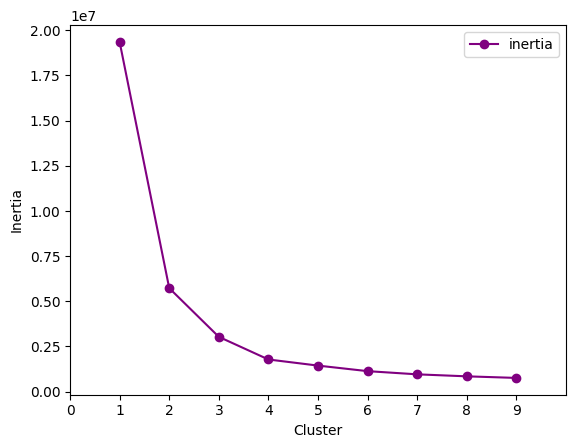

In [ ]:
# create and fit a range of models:
from sklearn.cluster import KMeans
km_list = list()
for clust in range(1, 10):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(df[num_cols])
    km_list.append(pd.Series({'clusters': clust,
                             'inertia':km.inertia_,
                             'model':km}))
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o', ls='-', color='purple')
ax.set_xticks(range(0, 10, 1))
ax.set_xlim(0,10)
ax.set(xlabel='Cluster', ylabel='Inertia');

#selected 2 cluster add to correlation matrix

In [ ]:

kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(df[num_cols])

#df['cust_type'] = kmeans.predict(df[features])
df['cust_type'] = kmeans.labels_
corr_df=pd.DataFrame(df.corr()["score"].sort_values(ascending=False)[:15])
corr_df.style.background_gradient(cmap='Blues')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,score
score,1.000000
5,0.695360
cust_type,0.415181
1,0.360445
11,0.333461
7,0.249929
3,0.175260
6,-0.376955
8,-0.381626
0,-0.388305


#additional steps

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
# YOUR CODE HERE: Create the cluster-distance features using `fit_transform`
X_cd = kmeans.fit_transform(df[num_cols])


# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X_cd[:2]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Centroid_0,Centroid_1
0,24.845210,389.083082
1,75.681239,439.702565


In [ ]:
X_cd.shape

(506, 2)

In [ ]:
new=pd.concat([df,X_cd],axis=1)

corr_df=pd.DataFrame(new.corr()["score"].sort_values(ascending=False)[:15])
corr_df.style.background_gradient(cmap='Blues')

,score
score,1.000000
5,0.695360
Centroid_1,0.418554
cust_type,0.415181
1,0.360445
11,0.333461
7,0.249929
3,0.175260
6,-0.376955
8,-0.381626
